In [1]:
import pandas as pd
import matplotlib
from matplotlib import pylab as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('../Data/2005-2010_Graduation_Outcomes_-_School_Level.csv')
df = df[df['Demographic'] == 'Total Cohort']
df['Demographic'].value_counts()

Total Cohort    2493
Name: Demographic, dtype: int64

In [3]:
df['BORO'] = [df.loc[i,'DBN'][2] for i in df.index]
df['BORO'].isnull().sum()

0

In [4]:
#Median Household Income
income_list = [['01', 42065], ['02', 92628], ['03', 110371], ['04', 35344], ['05', 36697], ['06', 41693], 
               ['07', 18237], ['08', 44490], ['09', 27243], ['10', 24590], ['11', 52782], ['12', 24590], ['13', 67081], 
               ['14', 39966], ['15', 67081], ['16', 40424], ['17', 48788], ['18', 68888], ['19', 40519], ['20', 63782], 
               ['21', 33209], ['22', 53997], ['23', 29125], ['24', 53907], ['25', 64493], ['26', 86854], ['27', 60748], 
               ['28', 60901], ['29', 88630], ['30', 54001], ['31', 78082], ['32', 33485]]
df_income = pd.DataFrame(income_list, columns = ['District', 'Income'])

In [5]:
# DON'T RUN TWICE
#df = df[(df.Cohort != '2006')]
#df.loc[ : , 'Cohort'] = df.loc[ : , 'Cohort'].replace('2006 Aug', '2006')

In [139]:
df.groupby('Cohort').Cohort.agg('count')

Cohort
2001    262
2002    318
2003    346
2004    367
2005    390
2006    405
Name: Cohort, dtype: int64

In [6]:
df['District'] = [df.loc[i,'DBN'][0:2] for i in df.index]
df = df.merge(df_income, on='District')

In [7]:
df.loc[ : ,'Merge Cohort'] = df['Cohort'].astype(int) + 1
df.loc[ : ,'Cohort'] = df['Cohort'].astype(int)
df_merge = df[['DBN', 'Cohort', 'Total Grads - % of cohort']]
df_merge = df_merge.rename(columns={"Cohort": "Cohort 2", 'Total Grads - % of cohort': 'y'})

df_master = df.merge(df_merge, 'left', left_on = ['DBN', 'Merge Cohort'], right_on = ['DBN','Cohort 2'])
df_master = df_master.drop(['Merge Cohort', 'Cohort 2'], axis=1)
df_master.loc[ : ,'Cohort'] = df_master['Cohort'].astype(str)
df = df_master

In [ ]:
y = df['Total Grads - % of cohort']
X = df.drop(['School Name', 'Total Grads - % of cohort', 'Total Grads - n', 'Total Regents - % of grads', \
             'Advanced Regents - % of grads', 'Regents w/o Advanced - % of grads', 'Local - n', 'Local - % of cohort', \
             'Local - % of grads', 'Still Enrolled - n', 'Still Enrolled - % of cohort'], axis = 1)
X

22.213795431173036


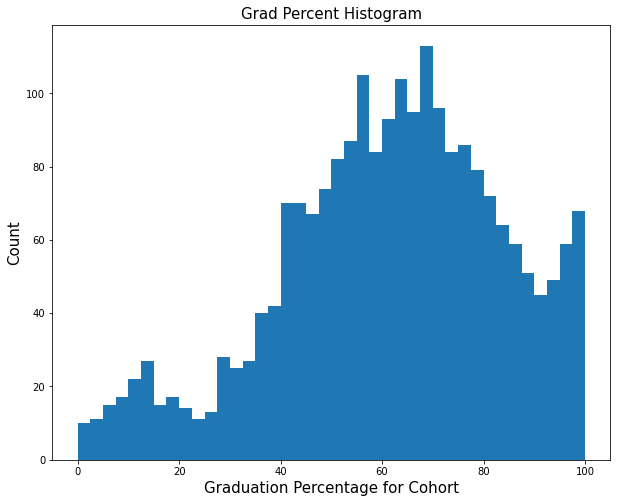

In [9]:
df['Total Grads - % of cohort'].plot.hist(bins = 40, figsize=(10,8))
plt.xlabel('Graduation Percentage for Cohort', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.title('Grad Percent Histogram', fontsize = 15)
print(df['Total Grads - % of cohort'].std())
#plt.savefig("figures/Grad%.png", bbox_inches='tight', dpi=600)

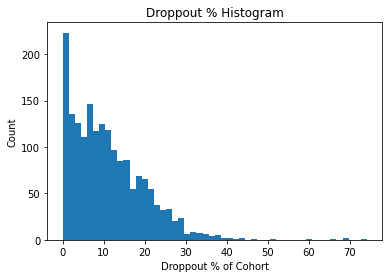

In [10]:
df['Dropped Out - % of cohort'].plot.hist(bins = 50)
plt.xlabel('Droppout % of Cohort')
plt.ylabel('Count')
plt.title('Droppout % Histogram')
plt.savefig("../Figures/Dropout.png", bbox_inches='tight', dpi=600)

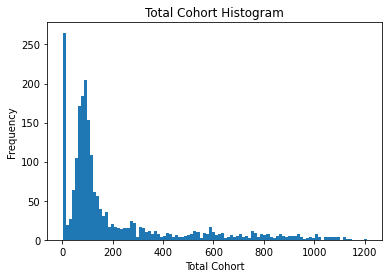

In [11]:
df['Total Cohort'].plot.hist(bins = 100)
plt.xlabel('Total Cohort')
plt.title('Total Cohort Histogram')
plt.savefig("../Figures/TotalCohort.png", bbox_inches='tight', dpi=600)

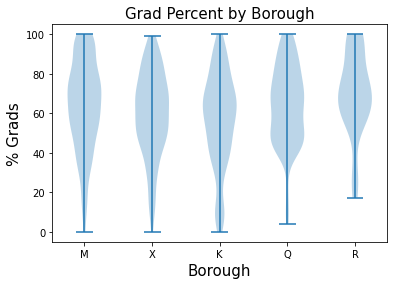

In [13]:
dataset = [df[df['BORO']== b]['Total Grads - % of cohort'].values for b in df['BORO'].unique()]
master = []
for lst in dataset:
    remove_nan = []
    master.append(lst[np.logical_not(np.isnan(lst))])

plt.violinplot(dataset = master)
plt.xticks([1,2,3,4,5],[b for b in df['BORO'].unique()])
#plt.xticks([1,2], ['YES', 'NO'])
plt.ylabel('% Grads', fontsize=15)
plt.xlabel('Borough', fontsize = 15)
plt.title('Grad Percent by Borough', fontsize =15)
plt.savefig("../Figures/Violin.png", bbox_inches='tight', dpi=600)
plt.show()

In [ ]:
df.groupby('BORO')['Total Grads - % of cohort'].agg('mean')

In [ ]:
df.groupby(['Cohort', 'BORO'])['Total Grads - % of cohort'].agg('mean')

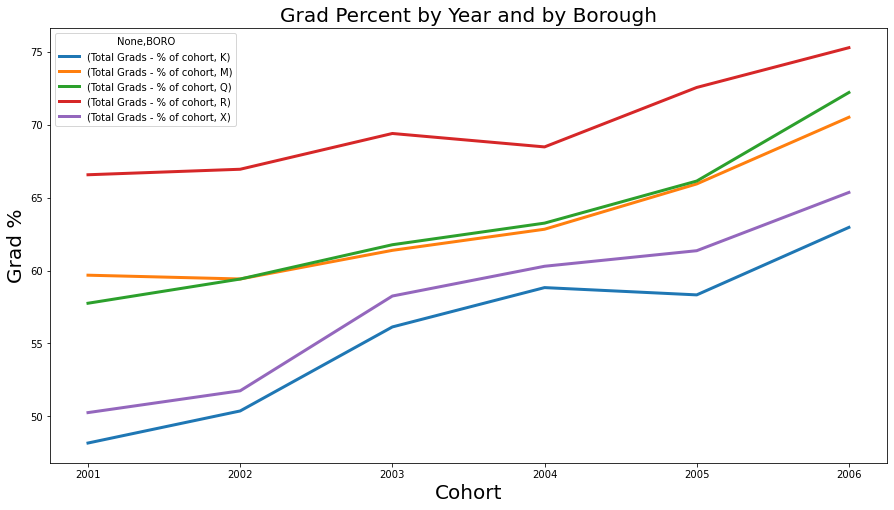

In [14]:
Cohort_Boro = pd.DataFrame(df[['Cohort','BORO', 'Total Grads - % of cohort']].groupby(['Cohort', 'BORO'])\
                           [['BORO', 'Total Grads - % of cohort']].mean().unstack())
Cohort_Boro.plot(figsize = (15,8), linewidth=3)
plt.xlabel('Cohort', fontsize = 20)
plt.ylabel('Grad %', fontsize = 20)
plt.title('Grad Percent by Year and by Borough', fontsize = 20)
plt.savefig("../Figures/LinePlot.png", bbox_inches='tight', dpi=600)
plt.show()
#source -https://www.kaggle.com/rgrajan/time-series-exploratory-data-analysis-forecast

In [15]:
print(df[df['Demographic'] == 'Total Cohort'].groupby('Cohort')['Total Grads - % of cohort'].agg('mean'))
df[df['Demographic'] == 'Total Cohort'].groupby('Cohort')['Total Grads - % of cohort'].agg('var')
#data is non-stationary

Cohort
2001    54.672146
2002    55.531325
2003    59.526978
2004    61.263804
2005    62.764088
2006    67.334921
Name: Total Grads - % of cohort, dtype: float64


Cohort
2001    532.196698
2002    530.590305
2003    494.141688
2004    476.464655
2005    477.839095
2006    432.268857
Name: Total Grads - % of cohort, dtype: float64

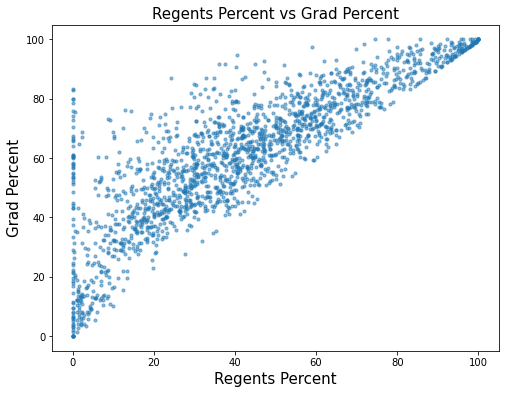

In [17]:
df.plot.scatter('Total Regents - % of cohort', 'Total Grads - % of cohort', s = 10, alpha = .5, figsize = (8,6))
plt.xlabel('Regents Percent', fontsize = 15)
plt.ylabel('Grad Percent', fontsize = 15)
plt.title('Regents Percent vs Grad Percent', fontsize= 15)
plt.savefig("../Figures/RegentsvsGrad.png", bbox_inches='tight', dpi=600)

Text(0.5, 1.0, 'Regents % vs y')

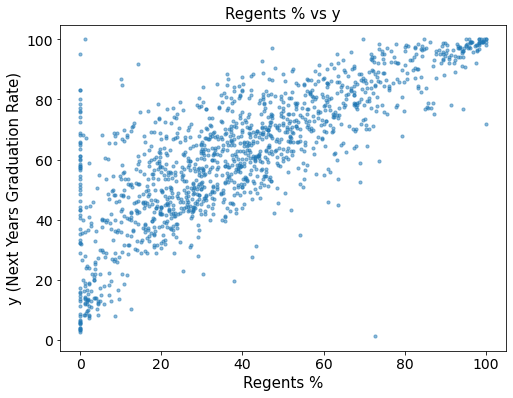

In [96]:
df.plot.scatter('Total Regents - % of cohort', 'y', s = 10, alpha = .5, figsize = (8,6))
plt.xlabel('Regents %', fontsize = 15)
plt.ylabel('y (Next Years Graduation Rate)', fontsize = 15)
plt.title('Regents % vs y', fontsize= 15)
#plt.savefig("../Figures/RegentsvsGrad.png", bbox_inches='tight', dpi=600)

Text(0.5, 1.0, 'Year j vs Year j+1 Grad Percent')

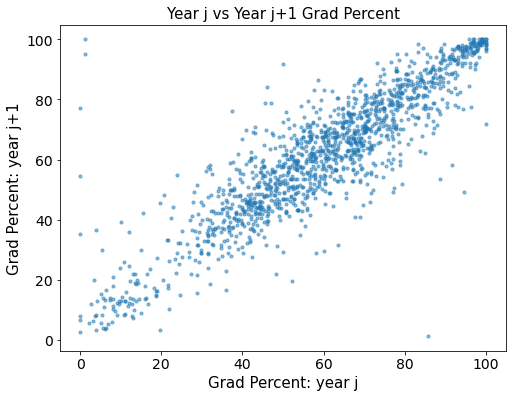

In [98]:
df.plot.scatter('Total Grads - % of cohort', 'y', s = 10, alpha = .5, figsize = (8,6))
plt.xlabel('Grad Percent: year j', fontsize = 15)
plt.ylabel('Grad Percent: year j+1', fontsize = 15)
plt.title('Year j vs Year j+1 Grad Percent', fontsize= 15)
#plt.savefig("../Figures/RegentsvsGrad.png", bbox_inches='tight', dpi=600)

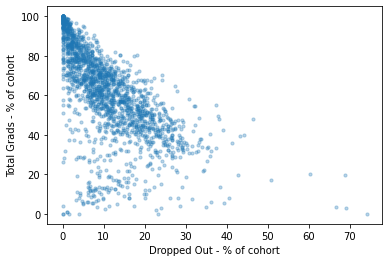

In [18]:
df.plot.scatter('Dropped Out - % of cohort','Total Grads - % of cohort', s = 10, alpha = .3)
plt.savefig("../Figures/DropoutvsGrads.png", bbox_inches='tight', dpi=600)

In [62]:
scatter_matrix_df = df.drop(['School Name', 'Total Grads - n', \
             'Advanced Regents - % of grads', 'Regents w/o Advanced - % of grads', 'Local - n', 'Local - % of cohort', \
             'Local - % of grads', 'Still Enrolled - n', 'Still Enrolled - % of cohort'], axis = 1)
scatter_matrix_df.columns

Index(['Demographic', 'DBN', 'Cohort', 'Total Cohort',
       'Total Grads - % of cohort', 'Total Regents - n',
       'Total Regents - % of cohort', 'Total Regents - % of grads',
       'Advanced Regents - n', 'Advanced Regents - % of cohort',
       'Regents w/o Advanced - n', 'Regents w/o Advanced - % of cohort',
       'Dropped Out - n', 'Dropped Out - % of cohort', 'BORO', 'District',
       'Income', 'y'],
      dtype='object')

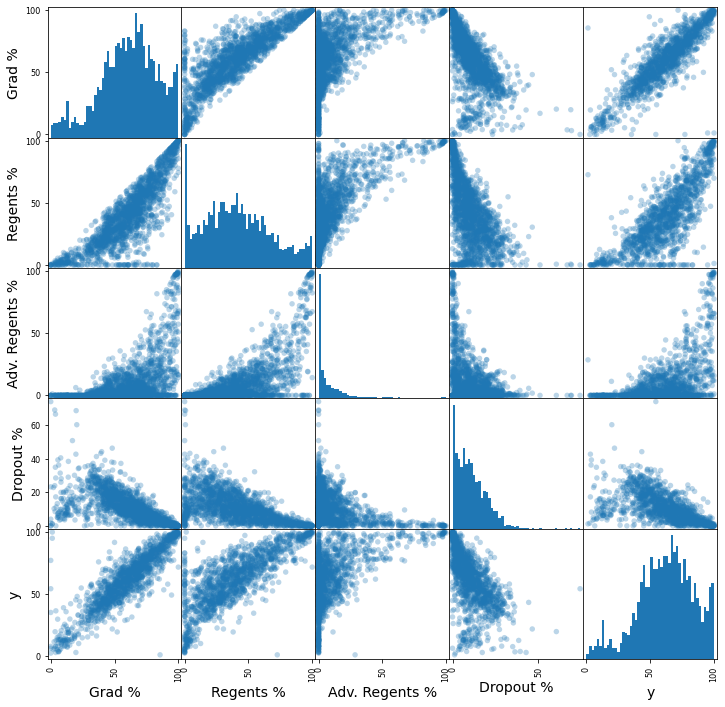

In [46]:
scatter_matrix_df = df.drop(['School Name', 'Total Grads - n', 'Total Regents - % of grads', \
             'Advanced Regents - % of grads', 'Regents w/o Advanced - % of grads', 'Local - n', 'Local - % of cohort', \
             'Local - % of grads', 'Still Enrolled - n', 'Still Enrolled - % of cohort'], axis = 1)
test = scatter_matrix_df.select_dtypes(float)
test = test.rename(columns={'Total Grads - % of cohort': 'Grad %', 'Total Regents - % of cohort': 'Regents %',\
                           'Advanced Regents - % of cohort': 'Adv. Regents %', 'Regents w/o Advanced - % of cohort': \
                            'Non-Adv Regents %', 'Dropped Out - % of cohort': 'Dropout %'}).drop('Non-Adv Regents %', axis = 1)
pd.plotting.scatter_matrix(test, figsize=(12, 12), marker='o',hist_kwds={'bins': 50}, 
                           s=30, alpha=.3)
#plt.title('Scatter Matrix- Continuous Variables', fontsize = 20)
plt.savefig("../Figures/ScatterMatrix2.png", bbox_inches='tight', dpi=600)
plt.show()


In [47]:
df2.corr()

,Total Cohort,Total Grads - % of cohort,Total Regents - % of cohort,Total Regents - % of grads,Advanced Regents - % of cohort,Advanced Regents - % of grads,Regents w/o Advanced - % of cohort,Regents w/o Advanced - % of grads,Local - % of cohort,Local - % of grads,Still Enrolled - % of cohort,Dropped Out - % of cohort,Income,y
Total Cohort,1.000000,-0.071171,0.069608,0.186119,0.256014,0.353821,-0.164267,-0.117062,-0.238651,-0.186042,-0.029493,0.231574,0.108015,-0.065205
Total Grads - % of cohort,-0.071171,1.000000,0.836774,0.555449,0.526705,0.463193,0.617150,0.211443,0.041635,-0.555431,-0.899237,-0.644299,0.062247,0.891493
Total Regents - % of cohort,0.069608,0.836774,1.000000,0.867957,0.689161,0.648765,0.676848,0.401372,-0.512202,-0.867817,-0.728786,-0.564318,0.123790,0.786269
Total Regents - % of grads,0.186119,0.555449,0.867957,1.000000,0.543565,0.570493,0.642921,0.629794,-0.712698,-0.999922,-0.515324,-0.338301,0.100770,0.566919
Advanced Regents - % of cohort,0.256014,0.526705,0.689161,0.543565,1.000000,0.968059,-0.066942,-0.279930,-0.431417,-0.543439,-0.446098,-0.362341,0.110543,0.514352
Advanced Regents - % of grads,0.353821,0.463193,0.648765,0.570493,0.968059,1.000000,-0.090110,-0.278661,-0.457346,-0.570346,-0.423362,-0.288666,0.101986,0.472533
Regents w/o Advanced - % of cohort,-0.164267,0.617150,0.676848,0.642921,-0.066942,-0.090110,1.000000,0.837022,-0.266980,-0.642856,-0.550326,-0.408955,0.058166,0.560130
Regents w/o Advanced - % of grads,-0.117062,0.211443,0.401372,0.629794,-0.279930,-0.278661,0.837022,1.000000,-0.400862,-0.629842,-0.202202,-0.122548,0.021371,0.216032
Local - % of cohort,-0.238651,0.041635,-0.512202,-0.712698,-0.431417,-0.457346,-0.266980,-0.400862,1.000000,0.712594,-0.080773,0.019395,-0.128263,-0.036580
Local - % of grads,-0.186042,-0.555431,-0.867817,-0.999922,-0.543439,-0.570346,-0.642856,-0.629842,0.712594,1.000000,0.515076,0.338652,-0.100666,-0.566939


In [8]:
#y = df['Total Grads - % of cohort']
print(df.shape)
df2 = df.drop(['School Name', 'Demographic', 'DBN', 'District'], axis = 1)
df2 = df2.reset_index(drop=True)
print(df2.shape)

(2088, 27)
(2088, 23)


In [150]:
df2.shape

(2088, 23)

In [9]:
df2 = df2.dropna()
df2.shape

(1406, 23)

In [206]:
for year in sorted(df['Cohort'].unique()):
    if year == '2006':
        continue
    data = df[df['Cohort'] == year]['y']

    print(year)
    print('std: ', np.std(data))
    sorted(data)
    data = list(data.dropna())

    q = np.percentile(data,[25,75])
    iqr = q[1] - q[0]
    print('iqr: ', iqr)
    outliers=[]
    
    threshold=2
    mean_1 = np.mean(data)
    std_1 =np.std(data)
    
    
    for y in data:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    print('num outliers', len(outliers))
    print('mean', np.mean(data))

2001
std:  22.23719487953265
iqr:  27.775
num outliers 12
mean 55.251694915254234
2002
std:  22.156832814647252
iqr:  30.599999999999994
num outliers 13
mean 59.12490842490842
2003
std:  21.780625598564516
iqr:  28.750000000000007
num outliers 17
mean 60.90218749999999
2004
std:  20.493430859653348
iqr:  26.499999999999986
num outliers 15
mean 63.58649425287356
2005
std:  20.482326544097372
iqr:  25.300000000000004
num outliers 24
mean 67.41935483870968


In [23]:
#DON"T USE
from sklearn.preprocessing import PolynomialFeatures
df_train = df2[df2['Cohort'] < '2005']
df_test = df2[df2['Cohort'] == '2005']

y_train = df_train['y']
y_test = df_test['y']

X_train = df_train.drop(['BORO', 'y'], axis=1)
X_test = df_test.drop(['BORO', 'y'], axis=1)

poly = PolynomialFeatures(degree=2, interaction_only=True)
X_train = pd.DataFrame(poly.fit_transform(X_train))
X_test = pd.DataFrame(poly.fit_transform(X_test))

In [28]:
from  sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


for alpha in [2**i for i in range(20)]:
    linreg = Ridge(alpha=alpha, max_iter=100000000)

    linreg.fit(X_train, y_train)
    y_train_pred = linreg.predict(X_train)
    y_test_pred = linreg.predict(X_test)

    train_rmse = mean_squared_error(y_train, y_train_pred,squared = False)
    train_r2 = r2_score(y_train, y_train_pred)

    test_rmse = mean_squared_error(y_test, y_test_pred,squared = False)
    test_r2 = r2_score(y_test, y_test_pred)

    print('  train RMSE:',(train_rmse))
    #print('  train R2', train_r2)
    print('   test RMSE:',(test_rmse))
    #print('   test R2', test_r2)

C:\Users\nclan\Anaconda3\envs\Data1030\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.00065e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\nclan\Anaconda3\envs\Data1030\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.92968e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\nclan\Anaconda3\envs\Data1030\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.73937e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\nclan\Anaconda3\envs\Data1030\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=6.22891e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\nclan\Anaconda3\envs\Data1030\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.2175e-18): result may not be accurate.
  overwrite_a

  train RMSE: 8.346246871631363
   test RMSE: 9.917049529886587
  train RMSE: 8.356231327752168
   test RMSE: 9.888184128064385
  train RMSE: 8.367695150504566
   test RMSE: 9.860316398696751
  train RMSE: 8.381517929458033
   test RMSE: 9.837020243860863
  train RMSE: 8.397944139251887
   test RMSE: 9.818728765497678


C:\Users\nclan\Anaconda3\envs\Data1030\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.35162e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\nclan\Anaconda3\envs\Data1030\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=5.35871e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\nclan\Anaconda3\envs\Data1030\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=9.64636e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\nclan\Anaconda3\envs\Data1030\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.85212e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\nclan\Anaconda3\envs\Data1030\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.46232e-17): result may not be accurate.
  overwrite_

  train RMSE: 8.416931922023439
   test RMSE: 9.803356364720335
  train RMSE: 8.438433037597953
   test RMSE: 9.785784212855935
  train RMSE: 8.46160236153572
   test RMSE: 9.759486913084404
  train RMSE: 8.484979258710819
   test RMSE: 9.719772928662863
  train RMSE: 8.508010947255695
   test RMSE: 9.666885206561933
  train RMSE: 8.53082935082498
   test RMSE: 9.606852213213477


C:\Users\nclan\Anaconda3\envs\Data1030\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=6.58948e-17): result may not be accurate.
  overwrite_a=True).T


  train RMSE: 8.552730677522476
   test RMSE: 9.548285861697366
  train RMSE: 8.572685551783305
   test RMSE: 9.498068892031105
  train RMSE: 8.590718771627689
   test RMSE: 9.45816836052589
  train RMSE: 8.607973935177762
   test RMSE: 9.425266435148556
  train RMSE: 8.626291675193261
   test RMSE: 9.392944423826735
  train RMSE: 8.64780021879259
   test RMSE: 9.353983094608367
  train RMSE: 8.673842050769705
   test RMSE: 9.303115762126074
  train RMSE: 8.704495079088044
   test RMSE: 9.240953977295375
  train RMSE: 8.739032739119025
   test RMSE: 9.176917165998704


In [22]:
X_train.shape

(1049, 1562)

In [ ]:
linreg = LinearRegression(fit_intercept=True)

linreg.fit(X_train, y_train)
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

train_rmse = mean_squared_error(y_train, y_train_pred,squared = False)
train_r2 = r2_score(y_train, y_train_pred)

test_rmse = mean_squared_error(y_test, y_test_pred,squared = False)
test_r2 = r2_score(y_test, y_test_pred)

print('  train RMSE:',(train_rmse))
print('  train R2', train_r2)
print('   test RMSE:',(test_rmse))
print('   test R2', test_r2)

In [10]:
def ts_train_test_spl(data):
    """Splits by year and transforms data for time series."""
    years = []
    d = {}
    for year in sorted(data['Cohort'].unique())[1:]:
               
        train = data[data['Cohort'] <= str(int(year) -1)]
        y_train = train[['y']]
        val = data[data['Cohort'] == year]
        y_val = val[['y']]
        train = train.drop('y', axis=1)
        val = val.drop('y', axis=1)
 

        onehot_ftrs = ['BORO']
        enc = OneHotEncoder(sparse=False,handle_unknown='ignore')
        enc.fit(train[onehot_ftrs])
        
        onehot_train = enc.transform(train[onehot_ftrs])
        onehot_val = enc.transform(val[onehot_ftrs])
        onehot_train = pd.DataFrame(onehot_train)
        onehot_val = pd.DataFrame(onehot_val)

        train = train.reset_index(drop=True)
        val = val.reset_index(drop=True)
        
        train2 = pd.concat([pd.DataFrame(train), pd.DataFrame(onehot_train)],ignore_index=True, axis = 1)
        train2.columns = list(train.columns) + list(enc.get_feature_names(onehot_ftrs))
        val2 = pd.concat([pd.DataFrame(val), pd.DataFrame(onehot_val)],ignore_index=True, axis = 1)
        val2.columns = list(val.columns) + list(enc.get_feature_names(onehot_ftrs))
        
        std_ftrs = ['Cohort', 'Total Cohort', 'Total Grads - n',
       'Total Grads - % of cohort', 'Total Regents - n',
       'Total Regents - % of cohort', 'Total Regents - % of grads',
       'Advanced Regents - n', 'Advanced Regents - % of cohort',
       'Advanced Regents - % of grads', 'Regents w/o Advanced - n',
       'Regents w/o Advanced - % of cohort',
       'Regents w/o Advanced - % of grads', 'Local - n', 'Local - % of cohort',
       'Local - % of grads', 'Still Enrolled - n',
       'Still Enrolled - % of cohort', 'Dropped Out - n',
       'Dropped Out - % of cohort', 'Income']
        
        std_target = ['y']
        
        scaler = StandardScaler()
        train_t = scaler.fit_transform(train2[std_ftrs])
        val_t = scaler.transform(val2[std_ftrs])
        
        df_train = pd.concat([train2[['BORO_K', 'BORO_M', 'BORO_Q', 'BORO_R', 'BORO_X']], pd.DataFrame(train_t)],ignore_index=True, axis = 1)
        df_train.columns = ['BORO_K', 'BORO_M', 'BORO_Q', 'BORO_R', 'BORO_X'] + std_ftrs
        
        df_val = pd.concat([val2[['BORO_K', 'BORO_M', 'BORO_Q', 'BORO_R', 'BORO_X']], pd.DataFrame(val_t)],ignore_index=True, axis = 1)
        df_val.columns = ['BORO_K', 'BORO_M', 'BORO_Q', 'BORO_R', 'BORO_X'] + std_ftrs
        
        d[year] = [df_train, y_train, df_val, y_val] 
    return d
dictionary = ts_train_test_spl(df2)

In [33]:
#COPY OF FUNCTION BEFORE CHANGING!
#def ts_train_test_spl(data):
    """Splits by year and transforms data for time series."""
    years = []
    d = {}
    for year in sorted(data['Cohort'].unique())[1:]:
               
        train = data[data['Cohort'] <= str(int(year) -1)]
        y_train = train[['Total Grads - % of cohort']]
        val = data[data['Cohort'] == year]
        y_val = val[['Total Grads - % of cohort']]
        train = train.drop('Total Grads - % of cohort', axis=1)
 

        onehot_ftrs = ['BORO']
        enc = OneHotEncoder(sparse=False,handle_unknown='ignore')
        enc.fit(train[onehot_ftrs])
        
        onehot_train = enc.transform(train[onehot_ftrs])
        onehot_val = enc.transform(val[onehot_ftrs])
        onehot_train = pd.DataFrame(onehot_train)
        onehot_val = pd.DataFrame(onehot_val)

        train = train.reset_index(drop=True)
        val = val.reset_index(drop=True)
        
        train2 = pd.concat([pd.DataFrame(train), pd.DataFrame(onehot_train)],ignore_index=True, axis = 1)
        train2.columns = list(train.columns) + list(enc.get_feature_names(onehot_ftrs))
        val2 = pd.concat([pd.DataFrame(val), pd.DataFrame(onehot_val)],ignore_index=True, axis = 1)
        val2.columns = list(val.columns) + list(enc.get_feature_names(onehot_ftrs))
        
        std_ftrs = ['Cohort', 'Total Cohort',
       'Total Regents - n', 'Total Regents - % of cohort',
       'Advanced Regents - n', 'Advanced Regents - % of cohort',
       'Regents w/o Advanced - n', 'Regents w/o Advanced - % of cohort',
        'Dropped Out - n', 'Dropped Out - % of cohort', 'Income'] 
        
        std_target = ['Total Grads - % of cohort']
        
        scaler = StandardScaler()
        train_t = scaler.fit_transform(train2[std_ftrs])
        val_t = scaler.transform(val2[std_ftrs])
        
        df_train = pd.concat([train2[['BORO_K', 'BORO_M', 'BORO_Q', 'BORO_R', 'BORO_X']], pd.DataFrame(train_t)],ignore_index=True, axis = 1)
        df_train.columns = ['BORO_K', 'BORO_M', 'BORO_Q', 'BORO_R', 'BORO_X'] + std_ftrs
        
        df_val = pd.concat([val2[['BORO_K', 'BORO_M', 'BORO_Q', 'BORO_R', 'BORO_X']], pd.DataFrame(val_t)],ignore_index=True, axis = 1)
        df_val.columns = ['BORO_K', 'BORO_M', 'BORO_Q', 'BORO_R', 'BORO_X'] + std_ftrs
        
        d[year] = [df_train, y_train, df_val, y_val] 
    return d
#dictionary = ts_train_test_spl(df2)

In [34]:
dictionary['2004'][2]

,BORO_K,BORO_M,BORO_Q,BORO_R,BORO_X,Cohort,Total Cohort,Total Regents - n,Total Regents - % of cohort,Advanced Regents - n,Advanced Regents - % of cohort,Regents w/o Advanced - n,Regents w/o Advanced - % of cohort,Dropped Out - n,Dropped Out - % of cohort,Income
0,0.0,1.0,0.0,0.0,0.0,2.352584,-0.782506,-0.574829,-0.173728,-0.409207,-0.552070,-0.607277,0.317635,-0.672129,-0.739323,-0.644666
1,0.0,1.0,0.0,0.0,0.0,2.352584,-0.571734,-0.446826,-0.127742,-0.349833,-0.264973,-0.427742,0.095022,-0.653225,-0.948625,-0.644666
2,0.0,1.0,0.0,0.0,0.0,2.352584,-0.690062,-0.365982,0.941442,-0.409207,-0.552070,-0.179154,1.897648,-0.558704,-0.100404,-0.644666
3,0.0,1.0,0.0,0.0,0.0,2.352584,-0.745529,-0.601777,-0.591438,-0.379520,-0.307506,-0.703950,-0.523952,-0.577608,0.009755,-0.644666
4,0.0,1.0,0.0,0.0,0.0,2.352584,-0.246332,-0.190820,0.060036,0.184539,1.042914,-0.648709,-0.980038,-0.256237,0.031786,-0.644666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319,1.0,0.0,0.0,0.0,0.0,2.352584,-0.597618,-0.473774,-0.189057,-0.399312,-0.498904,-0.413931,0.241621,-0.501991,-0.089388,-0.983605
320,1.0,0.0,0.0,0.0,0.0,2.352584,-0.612409,-0.507459,-0.334680,-0.389416,-0.445738,-0.496794,-0.013570,-0.615417,-0.695260,-0.983605
321,1.0,0.0,0.0,0.0,0.0,2.352584,-0.900834,-0.628725,0.140512,-0.409207,-0.552070,-0.717761,0.762862,-0.709938,-0.871514,-0.983605
322,1.0,0.0,0.0,0.0,0.0,2.352584,-0.686365,-0.568092,-0.507129,-0.399312,-0.488270,-0.607277,-0.219895,-0.653225,-0.805419,-0.983605


In [13]:
dates = ['2002', '2003', '2004', '2005']
for date in dates:
    print(np.std(dictionary[date][3]))

y    22.224859
dtype: float64
y    21.630181
dtype: float64
y    20.798021
dtype: float64
y    20.468969
dtype: float64


In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def reg_fit(d):
    dates = ['2002', '2003', '2004']
    linreg = LinearRegression(fit_intercept=True)
    for date in dates:
        linreg.fit(d[date][0], d[date][1])
        print(date)
    
        y_train_pred = linreg.predict(d[date][0])
        y_test_pred = linreg.predict(d[date][2])

        train_rmse = mean_squared_error(d[date][1], y_train_pred,squared = False)
        train_r2 = r2_score(d[date][1],y_train_pred)

        test_rmse = mean_squared_error(d[date][3], y_test_pred, squared = False)
        test_r2 = r2_score(d[date][3], y_test_pred)
        
        print('   train RMSE:',(train_rmse))
        print('   train R2', train_r2)
        print('   test RMSE:',(test_rmse))
        print('   test R2', test_r2)
reg_fit(dictionary)

2002
   train RMSE: 7.682535479923396
   train R2 0.8681249634309771
   test RMSE: 10.30717065583177
   test R2 0.7849195682712173
2003
   train RMSE: 8.258432402175396
   train R2 0.8558224526837691
   test RMSE: 9.67547124602105
   test R2 0.7999106604917527
2004
   train RMSE: 8.745924836652732
   train R2 0.8391232529226862
   test RMSE: 10.258050719210472
   test R2 0.7567316186440352
2005
   train RMSE: 9.194419590071892
   train R2 0.8190484311273787
   test RMSE: 9.046004721225616
   test R2 0.804691266122631


2002


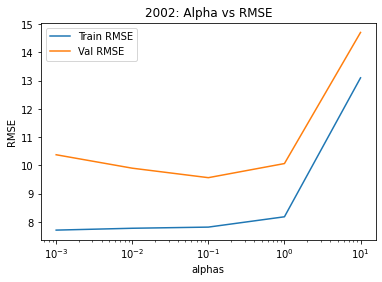

   min alpha: 0.1
   min val rmse: 9.569312894185625
test rmse:  9.88089208082889
2003


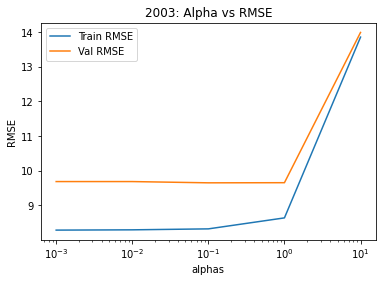

   min alpha: 0.1
   min val rmse: 9.651879354189212
test rmse:  10.78090743255249
2004


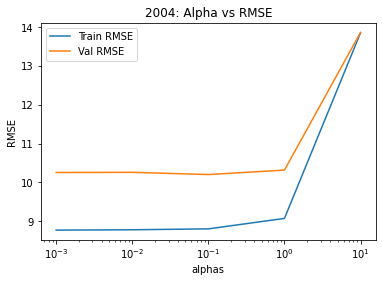

   min alpha: 0.1
   min val rmse: 10.203193970701296
test rmse:  9.481728599431532


In [11]:
#RERUN THIS CODE
from matplotlib import pylab as plt
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
def lasso_reg(d, alphas):
    dates = ['2002', '2003', '2004']
    for date in dates:
        print(date)
        train_rmse_list = []
        val_rmse_list = [] 
        models_list = []
        for alpha in alphas:

            linreg = Lasso(alpha=alpha, max_iter=100000)
            linreg.fit(d[date][0], d[date][1])

            y_train_pred = linreg.predict(d[date][0])
            y_val_pred = linreg.predict(d[date][2])

            train_rmse = mean_squared_error(d[date][1], y_train_pred,squared = False)
            train_r2 = r2_score(d[date][1],y_train_pred)

            val_rmse = mean_squared_error(d[date][3], y_val_pred, squared = False)
            val_r2 = r2_score(d[date][3], y_val_pred)
            
            train_rmse_list.append(train_rmse)
            val_rmse_list.append(val_rmse)

        plt.plot(alphas, train_rmse_list, label='Train RMSE')
        plt.plot(alphas, val_rmse_list, label='Val RMSE')
        #plt.figure(figsize=(8,6))
        plt.legend()
        plt.xlabel('alphas')
        plt.ylabel('RMSE')
        plt.semilogx()
        plt.title(f"{date}: Alpha vs RMSE")
        plt.show()
        min_index = val_rmse_list.index(min(val_rmse_list))
        print(f"   min alpha: {alphas[min_index]}")
        print(f"   min val rmse: {val_rmse_list[min_index]}")

        linreg = Lasso(alpha=alphas[min_index], max_iter=100000000)
        linreg.fit(d[date][0], d[date][1])

        y_test_pred = linreg.predict(d[str(int(date)+1)][2])
        test_rmse = mean_squared_error(d[str(int(date)+1)][3], y_test_pred,squared = False)
        print('test rmse: ', test_rmse)     

alphas = [1e-3, 1e-2, 1e-1, 1e0, 1e1]
lasso_reg(dictionary, alphas)

In [28]:
#DON"T USE
linreg = Lasso(alpha=1e-5, max_iter=100000000)

d = dictionary
linreg.fit(d['2005'][0], d['2005'][1].values.ravel())

y_test_pred = linreg.predict(d['2006'][2])

test_rmse = mean_squared_error(d['2006'][3], y_test_pred, squared = False)
test_r2 = r2_score(d['2006'][3], y_test_pred)

print('test rmse: ', test_rmse)
print('test r2: ', test_r2)

test rmse:  10.934183461827063
test r2:  0.7226876474891821


2002


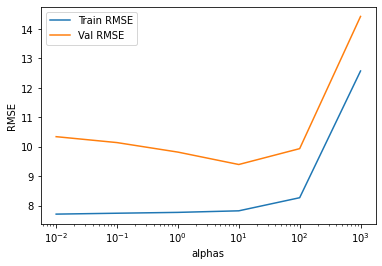

   min alpha: 10.0
   min val rmse: 9.400982308821055
test rmse:  9.869369494947964
2003


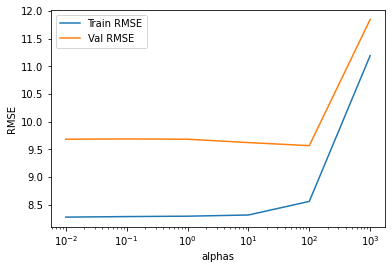

   min alpha: 100.0
   min val rmse: 9.567425008099086
test rmse:  10.50273255128286
2004


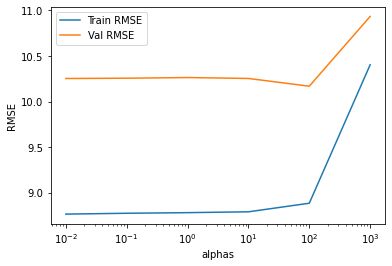

   min alpha: 100.0
   min val rmse: 10.168489930059852
test rmse:  9.562161639539573


In [24]:
from  sklearn.linear_model import Ridge

def ridge_reg(d, alphas):
    dates = ['2002', '2003', '2004']
    for date in dates:
        print(date)
        train_rmse_list = []
        val_rmse_list = [] 
        models_list = []
        for alpha in alphas:
            linreg = Ridge(alpha=alpha, max_iter=100000000)
            linreg.fit(d[date][0], d[date][1])

            y_train_pred = linreg.predict(d[date][0])
            y_val_pred = linreg.predict(d[date][2])

            train_rmse = mean_squared_error(d[date][1], y_train_pred,squared = False)
            train_r2 = r2_score(d[date][1],y_train_pred)

            val_rmse = mean_squared_error(d[date][3], y_val_pred, squared = False)
            val_r2 = r2_score(d[date][3], y_val_pred)
            
            train_rmse_list.append(train_rmse)
            val_rmse_list.append(val_rmse)
            
            #print('   train RMSE:',(train_rmse))
            #print('   train R2', train_r2)
            #print('    val RMSE:',(val_rmse))
            #print('    val R2', val_r2)
            
        plt.plot(alphas, train_rmse_list, label='Train RMSE')
        plt.plot(alphas, val_rmse_list, label='Val RMSE')
        plt.legend()
        plt.xlabel('alphas')
        plt.ylabel('RMSE')
        plt.semilogx()
        plt.show()
        min_index = val_rmse_list.index(min(val_rmse_list))
        print(f"   min alpha: {alphas[min_index]}")
        print(f"   min val rmse: {val_rmse_list[min_index]}")
        
        linreg = Ridge(alpha=alphas[min_index], max_iter=100000000)
        linreg.fit(d[date][0], d[date][1])

        y_test_pred = linreg.predict(d[str(int(date)+1)][2])
        test_rmse = mean_squared_error(d[str(int(date)+1)][3], y_test_pred,squared = False)
        print('test rmse: ', test_rmse)
        

alphas = [1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3]
ridge_reg(dictionary, alphas)

In [32]:
#DON"T USE
linreg = Ridge(alpha=10, max_iter=100000000)

d = dictionary
linreg.fit(d['2005'][0], d['2005'][1].values.ravel())

y_test_pred = linreg.predict(d['2006'][2])

test_rmse = mean_squared_error(d['2006'][3], y_test_pred, squared = False)
test_r2 = r2_score(d['2006'][3], y_test_pred)

print('test rmse: ', test_rmse)
print('test r2: ', test_r2)

test rmse:  9.140704097376032
test r2:  0.8061990942604013


In [26]:
from sklearn.linear_model import ElasticNet
from  sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


def elastic_reg(d, alphas, l1_ratio):
    dates = ['2002', '2003', '2004']
    for date in dates:
        print(date)
        train_rmse_list = []
        val_rmse_list = [] 

        for alpha in alphas: 
            for ratio in l1_ratio:

                linreg = ElasticNet(alpha=alpha, l1_ratio= ratio, max_iter=1000000000)
                linreg.fit(d[date][0], d[date][1])

                y_train_pred = linreg.predict(d[date][0])
                y_val_pred = linreg.predict(d[date][2])

                train_rmse = mean_squared_error(d[date][1], y_train_pred,squared = False)
                train_r2 = r2_score(d[date][1],y_train_pred)

                val_rmse = mean_squared_error(d[date][3], y_val_pred, squared = False)
                val_r2 = r2_score(d[date][3], y_val_pred)

                train_rmse_list.append((train_rmse, alpha, ratio))
                val_rmse_list.append((val_rmse, alpha, ratio))

        min_score = min(val_rmse_list, key = lambda x: x[0])
        print(f"  min alpha: {min_score[1]}, min l1: {min_score[2]}")
        print(f"  min val rmse: {min_score[0]}")
        
        linreg = ElasticNet(alpha=min_score[1], l1_ratio= min_score[2], max_iter=1000000000)
        linreg.fit(d[date][0], d[date][1])

        y_test_pred = linreg.predict(d[str(int(date)+1)][2])
        test_rmse = mean_squared_error(d[str(int(date)+1)][3], y_test_pred,squared = False)
        print('test rmse: ', test_rmse)

alphas, l1_ratio = [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2], np.linspace(1e-10, .99, 6)
elastic_reg(dictionary, alphas, l1_ratio)

2002
  min alpha: 0.1, min l1: 0.39600000006
  min val rmse: 9.37525586169031
test rmse:  9.858229469135654
2003
  min alpha: 0.1, min l1: 1e-10
  min val rmse: 9.546883129677113
test rmse:  10.556346991126958
2004
  min alpha: 0.1, min l1: 1e-10
  min val rmse: 10.185887599732286
test rmse:  9.539393219134638


In [23]:
#DON"T USE
linreg = ElasticNet(alpha=.01, l1_ratio=1e-10, max_iter=100000000)

d = dictionary
linreg.fit(d['2005'][0], d['2005'][1].values.ravel())

y_test_pred = linreg.predict(d['2006'][2])

test_rmse = mean_squared_error(d['2006'][3], y_test_pred, squared = False)
test_r2 = r2_score(d['2006'][3], y_test_pred)

print('test rmse: ', test_rmse)
print('test r2: ', test_r2)

test rmse:  9.141665266863717
test r2:  0.8061583347501967


In [29]:
from sklearn.ensemble import RandomForestRegressor

def rf_reg(d, max_depth, max_features, rs):
    dates = ['2002', '2003', '2004']

    for date in dates:
        print(date)
        train_rmse_list = []
        val_rmse_list = [] 

        for depth in max_depth: 
            for features in max_features:
                rf_reg = RandomForestRegressor(max_depth=depth, max_features=features, random_state=rs)

                rf_reg.fit(d[date][0], d[date][1].values.ravel())

                y_train_pred = rf_reg.predict(d[date][0])
                y_val_pred = rf_reg.predict(d[date][2])

                train_rmse = mean_squared_error(d[date][1], y_train_pred,squared = False)
                train_r2 = r2_score(d[date][1],y_train_pred)

                val_rmse = mean_squared_error(d[date][3], y_val_pred, squared = False)
                val_r2 = r2_score(d[date][3], y_val_pred)

                train_rmse_list.append((train_rmse, depth, features))
                val_rmse_list.append((val_rmse, depth, features))

        min_score = min(val_rmse_list, key = lambda x: x[0])
        print(f"  min max_depth: {min_score[1]}, min max_features: {min_score[2]}")
        print(f"  min val rmse: {min_score[0]}")
        
        rf_reg = RandomForestRegressor(max_depth=min_score[1], max_features=min_score[2], random_state=rs)
        rf_reg.fit(d[date][0], d[date][1].values.ravel())

        y_test_pred = rf_reg.predict(d[str(int(date)+1)][2])
        test_rmse = mean_squared_error(d[str(int(date)+1)][3], y_test_pred,squared = False)
        print('test rmse: ', test_rmse)

max_depth = [k**2 for k in range(1,7)] 
max_features = [.5, .6, .7, .8, .9, 1] 
rs = 4       
        
rf_reg(dictionary, max_depth, max_features, rs)

2002
  min max_depth: 25, min max_features: 0.5
  min val rmse: 9.836275158391848
test rmse:  10.151002853252479
2003
  min max_depth: 16, min max_features: 0.5
  min val rmse: 9.729663954252464
test rmse:  10.756206234334087
2004
  min max_depth: 25, min max_features: 1
  min val rmse: 9.92207995714235
test rmse:  10.474382715946179


In [25]:
#DON'T USE
rf_reg = RandomForestRegressor(max_depth=16, max_features=1, random_state=4)
d = dictionary
rf_reg.fit(d['2005'][0], d['2005'][1].values.ravel())

y_test_pred = rf_reg.predict(d['2006'][2])

test_rmse = mean_squared_error(d['2006'][3], y_test_pred, squared = False)
test_r2 = r2_score(d['2006'][3], y_test_pred)

print('test rmse: ', test_rmse)
print('test r2: ', test_r2)

test rmse:  9.574722904942758
test r2:  0.787358057727429


In [ ]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

zs_new_test = np.array([[zs_test[i*6+j] for j in range(6)] for i in range(6)])

ax.plot_wireframe(xs, ys, zs_new, rstride=1, cstride=1)
ax.plot_wireframe(xs, ys, zs_new_test, rstride=1, cstride=1)

plt.show()

In [ ]:
Z.shape

In [ ]:
xs = [1,4,9,16,25,36]
ys = [.5, .6, .7, .8, .9, 1]
xs, ys = np.meshgrid(xs, ys)
zs_new = np.array([[zs[i*6+j] for j in range(6)] for i in range(6)])
ax.plot_wireframe(X=xs, Y=ys, Z=zs_new)
plt.show()

In [ ]:
[[i*6+j for i in range(6)] for j in range(6)]

In [ ]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = plt.axes(projection='3d')
xs = [scores[1] for scores in train_rsme_list]
ys = [scores[2] for scores in train_rsme_list]
zs = [scores[0] for scores in train_rsme_list]

xs_test = [scores[1] for scores in test_rsme_list]
ys_test = [scores[2] for scores in test_rsme_list]
zs_test = [scores[0] for scores in test_rsme_list]
ax.scatter(xs=[9], ys=[.7], zs=[8.186], zdir='z', s=100, c='k', depthshade=True)
ax.scatter(xs=xs, ys=ys, zs=zs, zdir='z', s=20, c='r', depthshade=True)
ax.scatter(xs=xs_test, ys=ys_test, zs=zs_test, zdir='z', s=20, c='b', depthshade=True)

In [200]:
from sklearn.svm import SVR

def svm_reg(d, gamma_vals, C_vals, kernels):
    dates = ['2002', '2003', '2004']
    for date in dates:
        print(date)
        train_rmse_list = []
        val_rmse_list = [] 

        for gamma in gamma_vals: 
            for C in C_vals:
                for kernel in kernels:
                    
                    svm_reg = SVR(kernel=kernel, gamma=gamma, C=C)

                    svm_reg.fit(d[date][0], d[date][1].values.ravel())

                    y_train_pred = svm_reg.predict(d[date][0])
                    y_val_pred = svm_reg.predict(d[date][2])

                    train_rmse = mean_squared_error(d[date][1], y_train_pred,squared = False)
                    train_r2 = r2_score(d[date][1],y_train_pred)

                    val_rmse = mean_squared_error(d[date][3], y_val_pred, squared = False)
                    val_r2 = r2_score(d[date][3], y_val_pred)

                    train_rmse_list.append((train_rmse, kernel, gamma, C))
                    val_rmse_list.append((val_rmse, kernel, gamma, C))

        min_score = min(val_rmse_list, key = lambda x: x[0])
        print(f"  min kernel: {min_score[1]}, min gamma: {min_score[2]}, min C: {min_score[3]}")
        print(f"  min val rmse: {min_score[0]}")
        
        svm_reg = SVR(kernel=min_score[1], gamma=min_score[2], C=min_score[3])
        
        svm_reg.fit(d[date][0], d[date][1].values.ravel())

        y_test_pred = svm_reg.predict(d[str(int(date)+1)][2])
        test_rmse = mean_squared_error(d[str(int(date)+1)][3], y_test_pred,squared = False)
        print('test rmse: ', test_rmse)

kernel = ['linear', 'poly', 'rbf', 'sigmoid']
gamma_vals = [2**k for k in range(-15,-7)]
C_vals = [2**k for k in range(5,9)]     
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
        
svm_reg(dictionary, gamma_vals, C_vals, kernels)

2002
  min kernel: rbf, min gamma: 0.00048828125, min C: 256
  min val rmse: 9.422346522016774
test rmse:  9.931287403560146
2003
  min kernel: sigmoid, min gamma: 0.00048828125, min C: 256
  min val rmse: 9.43954554021671
test rmse:  10.442639335446241
2004
  min kernel: rbf, min gamma: 0.0001220703125, min C: 128
  min val rmse: 10.099305678840777
test rmse:  9.440684615695643


In [49]:
svm_test = [9.440684615695643, 10.442639335446241, 9.931287403560146]
baseline = [21.8199395053574, 21.350413614292982, 22.056622278712453]
(np.mean(baseline) - np.mean(svm_test)) / (np.std(svm_test) + np.std(baseline))

16.801558424049293

In [50]:
#SVR FOR GRAPHING PARAMETERS
from sklearn.svm import SVR

def param_graph_svm_reg(d, gamma_vals, C_vals):
    dates = ['2004']
    for date in dates:
        print(date)
        train_rmse_list = []
        val_rmse_list = [] 

        for gamma in gamma_vals: 
            for C in C_vals:

                svm_reg = SVR(kernel='rbf', gamma=gamma, C=C)

                svm_reg.fit(d[date][0], d[date][1].values.ravel())

                y_train_pred = svm_reg.predict(d[date][0])
                y_val_pred = svm_reg.predict(d[date][2])

                train_rmse = mean_squared_error(d[date][1], y_train_pred,squared = False)
                train_r2 = r2_score(d[date][1],y_train_pred)

                val_rmse = mean_squared_error(d[date][3], y_val_pred, squared = False)
                val_r2 = r2_score(d[date][3], y_val_pred)

                train_rmse_list.append((train_rmse, gamma, C))
                val_rmse_list.append((val_rmse, gamma, C))

        min_score = min(val_rmse_list, key = lambda x: x[0])
        print(f"  min gamma: {min_score[1]}, min C: {min_score[2]}")
        print(f"  min val rmse: {min_score[0]}")

    return val_rmse_list, train_rmse_list

gamma_vals = [2**k for k in range(-14,-6)]
C_vals = [2**k for k in range(5,9)]     
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
        
val_params, train_params = param_graph_svm_reg(dictionary, gamma_vals, C_vals)

2004
  min gamma: 0.0001220703125, min C: 128
  min val rmse: 10.099305678840777


In [69]:
gamma_vals

[6.103515625e-05,
 0.0001220703125,
 0.000244140625,
 0.00048828125,
 0.0009765625,
 0.001953125,
 0.00390625,
 0.0078125]

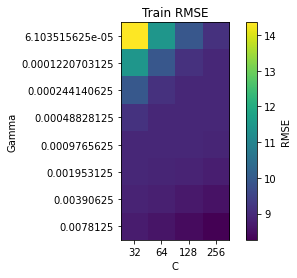

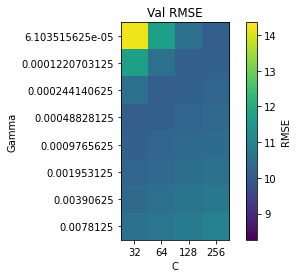

In [68]:
zs = [scores[0] for scores in train_params]

min_score = min(val_params, key = lambda x: x[0])

zs_test = [scores[0] for scores in val_params]

z_grid = [[zs[i*4+j] for j in range(4)] for i in range(8)]
z_grid_test = [[zs_test[i*4+j] for j in range(4)] for i in range(8)]

plt.imshow(z_grid, vmin=np.min(zs), vmax=np.max(zs))

plt.xticks([0,1,2,3],C_vals)
plt.yticks([i for i in range(len(gamma_vals))], gamma_vals) 

plt.title("Train RMSE")
plt.xlabel("C")
plt.ylabel("Gamma")
plt.colorbar(label='RMSE')
plt.show()

plt.imshow(z_grid_test, vmin=np.min(zs), vmax=np.max(zs))

plt.xticks([0,1,2,3],C_vals)
plt.yticks([i for i in range(len(gamma_vals))], gamma_vals) 

plt.title("Val RMSE")
plt.xlabel("C")
plt.ylabel("Gamma")
plt.colorbar(label='RMSE')
plt.show()

In [64]:
min_score

(10.099305678840777, 0.0001220703125, 128)

<IPython.core.display.Javascript object>


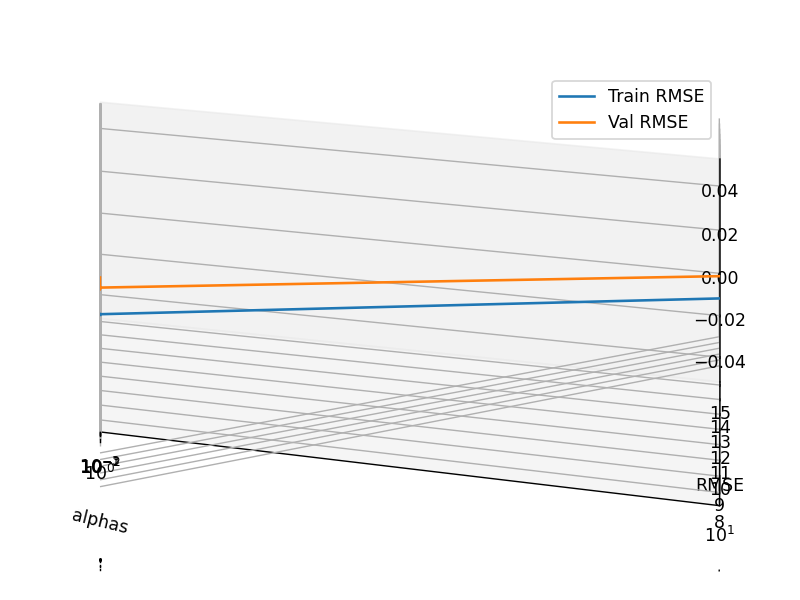

In [19]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = plt.axes(projection='3d')
xs = [scores[1] for scores in train_params]
ys = [scores[2] for scores in train_params]
zs = [scores[0] for scores in train_params]

min_score = min(val_params, key = lambda x: x[0])

xs_test = [scores[1] for scores in val_params]
ys_test = [scores[2] for scores in val_params]
zs_test = [scores[0] for scores in val_params]

#ax.scatter(xs=xs, ys=ys, zs=zs, zdir='z', s=20, c='r', depthshade=False)
#ax.scatter(xs=xs_test, ys=ys_test, zs=zs_test, zdir='z', s=20, c='b', depthshade=False)
#ax.scatter(xs=min_score[1], ys=min_score[2], zs=min_score[0], zdir='z', s=100, c='k', depthshade=False)
#ax.set_xlabel('Gamma')
#ax.set_ylabel('C')
#ax.set_zlabel('RMSE')

In [202]:
#DON'T USE
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

svm_reg = SVR(kernel='rbf', gamma=0.0078125, C=2048)

d = dictionary
svm_reg.fit(d['2005'][0], d['2005'][1].values.ravel())

y_test_pred = svm_reg.predict(d['2006'][2])

test_rmse = mean_squared_error(d['2006'][3], y_test_pred, squared = False)
test_r2 = r2_score(d['2006'][3], y_test_pred)

print('test rmse: ', test_rmse)
print('test r2: ', test_r2)

KeyError: '2006'

In [31]:
from sklearn.neighbors import KNeighborsRegressor

def knn_reg(d, n_neighbors, weights):
    dates = ['2002', '2003', '2004']
    for date in dates:
        print(date)
        train_rmse_list = []
        val_rmse_list = [] 

        for n in n_neighbors: 
            for weight in weights:
                knn_reg = KNeighborsRegressor(n_neighbors=n, weights=weight)

                knn_reg.fit(d[date][0], d[date][1].values.ravel())

                y_train_pred = knn_reg.predict(d[date][0])
                y_val_pred = knn_reg.predict(d[date][2])

                train_rmse = mean_squared_error(d[date][1], y_train_pred,squared = False)
                train_r2 = r2_score(d[date][1],y_train_pred)

                val_rmse = mean_squared_error(d[date][3], y_val_pred, squared = False)
                val_r2 = r2_score(d[date][3], y_val_pred)

                train_rmse_list.append((train_rmse, n, weight))
                val_rmse_list.append((val_rmse, n, weight))

        min_score = min(val_rmse_list, key = lambda x: x[0])
        print(f"  min n_neighbors: {min_score[1]}, min weight: {min_score[2]}")
        print(f"  min val rmse: {min_score[0]}")
        
        knn_reg = KNeighborsRegressor(n_neighbors=min_score[1], weights=min_score[2])
        
        knn_reg.fit(d[date][0], d[date][1].values.ravel())

        y_test_pred = knn_reg.predict(d[str(int(date)+1)][2])
        test_rmse = mean_squared_error(d[str(int(date)+1)][3], y_test_pred,squared = False)
        print('test rmse: ', test_rmse)

n_neighbors, weights = [1, 3,10,30,100], ['uniform', 'distance']
        
knn_reg(dictionary,n_neighbors, weights)

2002
  min n_neighbors: 10, min weight: distance
  min val rmse: 10.664408224357585
test rmse:  10.70275714640964
2003
  min n_neighbors: 3, min weight: distance
  min val rmse: 10.84167190852617
test rmse:  12.168211411851514
2004
  min n_neighbors: 10, min weight: distance
  min val rmse: 10.854537217226392
test rmse:  10.030386439961198


In [23]:
#DON'T USE
knn_reg = KNeighborsRegressor(n_neighbors=3, weights='distance')

d = dictionary
knn_reg.fit(d['2005'][0], d['2005'][1].values.ravel())

y_test_pred = knn_reg.predict(d['2006'][2])

test_rmse = mean_squared_error(d['2006'][3], y_test_pred, squared = False)
test_r2 = r2_score(d['2006'][3], y_test_pred)

print('test rmse: ', test_rmse)
print('test r2: ', test_r2)

test rmse:  9.767644377466816
test r2:  0.7787026666430185


In [32]:
import xgboost
from sklearn.neighbors import KNeighborsRegressor

def xgb_reg(d, learning_rate, colsample_bytree, subsample):
    dates = ['2002', '2003', '2004']
    scores_best = []
    for date in dates:
        print(date)
        train_rmse_list = []
        val_rmse_list = [] 

        for rate in learning_rate: 
            for n in colsample_bytree:
                for sample in subsample:

                    xgb_reg = xgboost.XGBRegressor(eta=rate, colsample_bytree=n, subsample=sample, seed=11)

                    xgb_reg.fit(d[date][0], d[date][1].values.ravel())

                    y_train_pred = xgb_reg.predict(d[date][0])
                    y_val_pred = xgb_reg.predict(d[date][2])

                    train_rmse = mean_squared_error(d[date][1], y_train_pred,squared = False)
                    train_r2 = r2_score(d[date][1],y_train_pred)

                    val_rmse = mean_squared_error(d[date][3], y_val_pred, squared = False)
                    val_r2 = r2_score(d[date][3], y_val_pred)

                    train_rmse_list.append((train_rmse, rate, n, sample))
                    val_rmse_list.append((val_rmse, rate, n, sample))

        min_score = min(val_rmse_list, key = lambda x: x[0])
        print(f"  min rate: {min_score[1]}, min colsample_bytree: {min_score[2]}, min subsample: {min_score[3]}")
        print(f"  min val rmse: {min_score[0]}")
        scores_best.append(min_score[0])
        
                        
        xgb_reg = xgboost.XGBRegressor(eta=min_score[1], colsample_bytree=min_score[2], subsample=min_score[3], seed=11)

        
        xgb_reg.fit(d[date][0], d[date][1].values.ravel())

        y_test_pred = xgb_reg.predict(d[str(int(date)+1)][2])
        test_rmse = mean_squared_error(d[str(int(date)+1)][3], y_test_pred,squared = False)
        print('test rmse: ', test_rmse)
        
        
    print('average score :', np.mean(scores_best[0:4]))


learning_rate = [.2, .4, .6, .8, .9, 1]
n_estimators = [10000]
seed =[0],
missing = [np.nan] 
colsample_bytree = [.2, .4, .6, .8, .9, 1]              
subsample = [.2, .4, .6, .8, .9, 1]
        
xgb_reg(dictionary, learning_rate, colsample_bytree, subsample)

2002
  min rate: 0.2, min colsample_bytree: 0.2, min subsample: 1
  min val rmse: 9.71140390926847
test rmse:  10.32794757756723
2003
  min rate: 0.2, min colsample_bytree: 0.4, min subsample: 1
  min val rmse: 9.771123297996636
test rmse:  10.613217939841592
2004
  min rate: 0.2, min colsample_bytree: 0.8, min subsample: 0.6
  min val rmse: 10.469820719150757
test rmse:  10.699263727727063
average score : 9.984115975471955


In [25]:
#rf_reg = RandomForestRegressor(max_depth=25, max_features=1, random_state=4)
xgb_reg = xgboost.XGBRegressor(eta=.2, colsample_bytree=1, subsample=.8, seed=11)

d = dictionary
xgb_reg.fit(d['2005'][0], d['2005'][1].values.ravel())

y_test_pred = xgb_reg.predict(d['2006'][2])

test_rmse = mean_squared_error(d['2006'][3], y_test_pred, squared = False)
test_r2 = r2_score(d['2006'][3], y_test_pred)

print('test rmse: ', test_rmse)
print('test r2: ', test_r2)

test rmse:  9.097420058229211
test r2:  0.8080301621680355


In [31]:
mean = np.mean(df2['y'])
n = len(df2['y'])
mean_squared_error([mean for i in range(n)], df2['y'], squared=False)

21.58160567293439

In [33]:
def baseline(d):
    dates = ['2002', '2003', '2004', '2005']
    #linreg = LinearRegression(fit_intercept=True)
    for date in dates:
        print(date)
        
        mean = np.mean(d[date][1])
        print('mean: ', mean)

    
        y_train_pred = [mean for i in range(len(d[date][1]))]
        y_test_pred = [mean for i in range(len(d[date][3]))]

        train_rmse = mean_squared_error(d[date][1], y_train_pred,squared = False)
        train_r2 = r2_score(d[date][1],y_train_pred)

        test_rmse = mean_squared_error(d[date][3], y_test_pred, squared = False)
        test_r2 = r2_score(d[date][3], y_test_pred)
        
        print('   train RMSE:',(train_rmse))
        print('   train R2', train_r2)
        print('   test RMSE:',(test_rmse))
        print('   test R2', test_r2)
baseline(dictionary)

2002
mean:  y    55.542056
dtype: float64
   train RMSE: 21.1554992182748
   train R2 0.0
   test RMSE: 22.320167542721617
   test R2 -0.008595129446542504
2003
mean:  y    56.626991
dtype: float64
   train RMSE: 21.749476176581215
   train R2 0.0
   test RMSE: 22.056622278712453
   test R2 -0.03981890534630206
2004
mean:  y    58.252276
dtype: float64
   train RMSE: 21.805151202373782
   train R2 0.0
   test RMSE: 21.350413614292982
   test R2 -0.053825169843844556
2005
mean:  y    59.742612
dtype: float64
   train RMSE: 21.61439792273948
   train R2 0.0
   test RMSE: 21.8199395053574
   test R2 -0.13635788261655324


In [ ]:
test_list = [(-1,1), (18, 3), (1,0)]
min(test_list, key = lambda x: x[0])

In [ ]:
#df2
print('data dimensions:',df2.shape)
perc_missing_per_ftr = df2.isnull().sum(axis=0)/df.shape[0]
print('fraction of missing values in features:')
print(perc_missing_per_ftr[perc_missing_per_ftr > 0])
print('data types of the features with missing values:')
print(df2[perc_missing_per_ftr[perc_missing_per_ftr > 0].index].dtypes)
frac_missing = sum(df2.isnull().sum(axis=1)!=0)/df2.shape[0]
print('fraction of points with missing values:',frac_missing)

In [39]:
np.random.seed(42)
from sklearn.svm import SVR


d = dictionary
svm_reg = SVR(kernel='rbf', gamma=0.0001220703125, C=128)

svm_reg.fit(d['2004'][0], d['2004'][1].values.ravel())

y_test_pred = svm_reg.predict(d['2005'][2])

df_test = dictionary['2005'][2]
y_test = dictionary['2005'][3]

nr_runs = 10
scores = np.zeros([len(df_test.columns),nr_runs])
baseline = np.mean(y_test)
                  
print('test score RMSE = ',np.sqrt(mean_squared_error(y_test,y_test_pred)))

score_changes = []

for i in range(len(df_test.columns)):
    print('shuffling '+str(df_test.columns[i]))
    rmse_scores = []
    for j in range(nr_runs):
        
        X_test_shuffled = df_test.copy()
        X_test_shuffled[df_test.columns[i]] = np.random.permutation(df_test[df_test.columns[i]].values)
        
        df_test_shuffle = pd.DataFrame(data=X_test_shuffled,columns = df_test.columns)
        
        y_test_shuffle_pred = svm_reg.predict(df_test_shuffle)
    
        rmse_scores.append(np.sqrt(mean_squared_error(y_test,y_test_shuffle_pred)))
        
    print('   shuffled test rmse score:',np.around(np.mean(rmse_scores),3),'+/-',np.around(np.std(rmse_scores),3))

    scores[i] = rmse_scores
    score_changes.append((i, np.around(np.mean(rmse_scores),3)))

important_features_rmse = sorted(score_changes, key = lambda x: x[1])

test score RMSE =  9.440684615695643
shuffling BORO_K
   shuffled test rmse score: 9.434 +/- 0.005
shuffling BORO_M
   shuffled test rmse score: 9.436 +/- 0.004
shuffling BORO_Q
   shuffled test rmse score: 9.442 +/- 0.001
shuffling BORO_R
   shuffled test rmse score: 9.44 +/- 0.001
shuffling BORO_X
   shuffled test rmse score: 9.444 +/- 0.006
shuffling Cohort
   shuffled test rmse score: 9.441 +/- 0.0
shuffling Total Cohort
   shuffled test rmse score: 9.404 +/- 0.021
shuffling Total Grads - n
   shuffled test rmse score: 9.502 +/- 0.012
shuffling Total Grads - % of cohort
   shuffled test rmse score: 12.041 +/- 0.229
shuffling Total Regents - n
   shuffled test rmse score: 9.472 +/- 0.013
shuffling Total Regents - % of cohort
   shuffled test rmse score: 10.334 +/- 0.119
shuffling Total Regents - % of grads
   shuffled test rmse score: 9.543 +/- 0.018
shuffling Advanced Regents - n
   shuffled test rmse score: 9.447 +/- 0.005
shuffling Advanced Regents - % of cohort
   shuffled test 

<IPython.core.display.Javascript object>


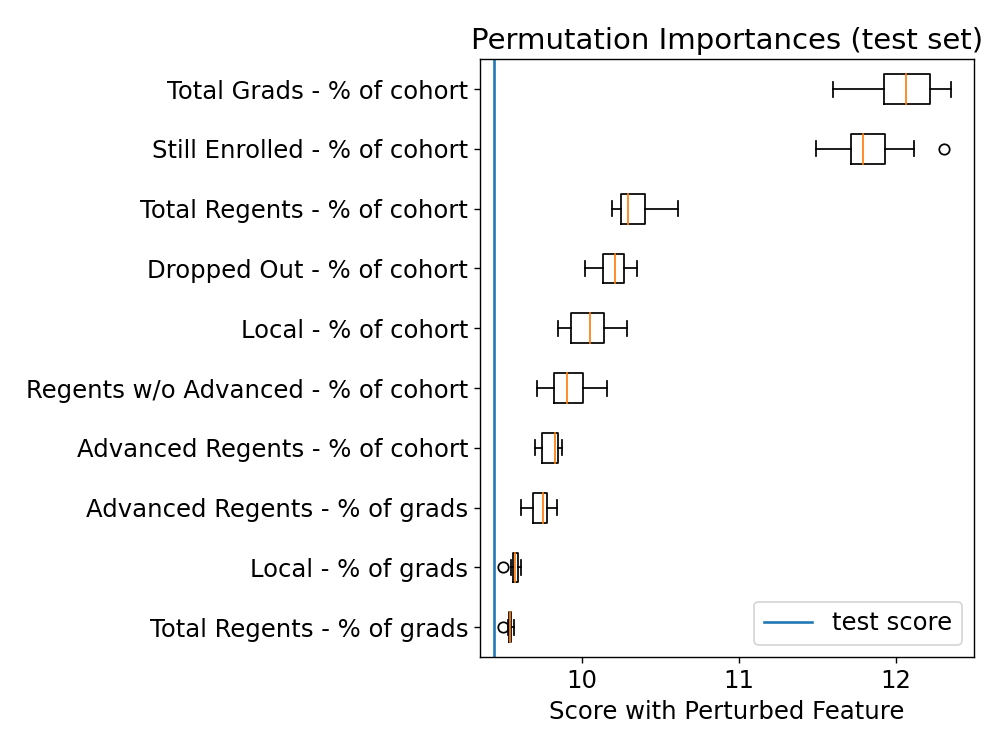

In [72]:
sorted_indcs = np.argsort(np.mean(scores,axis=1))[ : :-1][:10]
sorted_indcs = sorted_indcs[::-1]
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(8,6))
plt.boxplot(scores[sorted_indcs].T,labels=df_test.columns[sorted_indcs],vert=False)
plt.axvline(np.sqrt(mean_squared_error(y_test,y_test_pred)),label='test score')
plt.title("Permutation Importances (test set)")
plt.xlabel('Score with Perturbed Feature')
plt.legend()
plt.tight_layout()
plt.show()

In [57]:
for type in ['weight', 'gain', 'cover', 'total_gain', 'total_cover']:
    d = xgb_reg.get_booster().get_score(importance_type=type)
    most_imp = sorted(d, key=lambda key: d[key])[-10: : ]

    plt.rcParams.update({'font.size': 14})
    plt.figure(figsize=(10,8))
    plt.barh([feature for feature in most_imp], [d[feature] for feature in most_imp])
    plt.title(f'XGB {type} Feature Importance Metric')
    plt.xlabel('score')
    plt.legend()
    plt.tight_layout()
    plt.show()

AttributeError: 'function' object has no attribute 'get_booster'

In [48]:
import shap
#booster = svm_reg.get_booster() 
#model_bytearray = booster.save_raw()[4:]
#booster.save_raw = lambda : model_bytearray

#shap.initjs() # required for visualizations later on
#explainer = shap.TreeExplainer(booster)
#X_test_transformed = preprocessor.transform(X_test)
#print(np.shape(df_test))
#shap_values = explainer.shap_values(df_test[:1000])
#print(np.shape(shap_values))

In [56]:
np.random.seed(0)
svm_reg = SVR(kernel='sigmoid', gamma=0.0009765625, C=32)
svm_reg.fit(d['2004'][0], d['2004'][1].values.ravel())


explainer = shap.KernelExplainer(model = svm_reg.predict, data = d['2004'][0])
shap_values = explainer.shap_values(X=d['2005'][2], nsamples=100, l1_ref="num_features(4)")

Using 725 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


ImportError: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html

In [47]:
index1 = 0 
index2 = 100
index3 = 200
shap.force_plot(explainer.expected_value, shap_values[index1,:], features = X_test_transformed[index1,:],feature_names = feature_names)

NameError: name 'shap_values' is not defined

In [58]:
d['2004'][0].columns

Index(['BORO_K', 'BORO_M', 'BORO_Q', 'BORO_R', 'BORO_X', 'Cohort',
       'Total Cohort', 'Total Grads - n', 'Total Grads - % of cohort',
       'Total Regents - n', 'Total Regents - % of cohort',
       'Total Regents - % of grads', 'Advanced Regents - n',
       'Advanced Regents - % of cohort', 'Advanced Regents - % of grads',
       'Regents w/o Advanced - n', 'Regents w/o Advanced - % of cohort',
       'Regents w/o Advanced - % of grads', 'Local - n', 'Local - % of cohort',
       'Local - % of grads', 'Still Enrolled - n',
       'Still Enrolled - % of cohort', 'Dropped Out - n',
       'Dropped Out - % of cohort', 'Income'],
      dtype='object')